In [1]:
import os
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential

In [3]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [4]:
#import dataset
emotions = pd.read_csv("C:/Users/nyein/CZ4041/emotions/emotions.csv")

In [5]:
#train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(emotions, random_state=42, test_size=0.20, shuffle=True)
x_train = train.iloc[:,0:72]
y_train = train.iloc[:,-6:]
x_test = test.iloc[:,0:72]
y_test = test.iloc[:,-6:]

In [6]:
print("printing shape of input: {}".format(x_train.shape))
print("printing shape of target labels: {}".format(y_train.shape))

printing shape of input: (474, 72)
printing shape of target labels: (474, 6)


In [7]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(0,1))
x_scaled_train =  x_scaler.fit_transform(x_train)
x_scaled_test = x_scaler.fit_transform(x_test)
print("printing shaped of scaled data: {}".format(x_scaled_train.shape))

printing shaped of scaled data: (474, 72)


In [8]:
#extending dimensions for cnn
x_scaled_train = np.expand_dims(x_scaled_train, axis=2)
x_scaled_test = np.expand_dims(x_scaled_test, axis=2)
print("x_scaled_train shape: {}".format(x_scaled_train.shape))
print("x_scaled_test shape: {}".format(x_scaled_test.shape))

x_scaled_train shape: (474, 72, 1)
x_scaled_test shape: (119, 72, 1)


In [9]:
#extending dimensions for cnn
x_scaled_train = np.expand_dims(x_scaled_train, axis=3)
x_scaled_test = np.expand_dims(x_scaled_test, axis=2)
print("x_scaled_train shape: {}".format(x_scaled_train.shape))
print("x_scaled_test shape: {}".format(x_scaled_test.shape))

x_scaled_train shape: (474, 72, 1, 1)
x_scaled_test shape: (119, 72, 1, 1)


In [10]:
#expanding dimension for cnn
#x_scaled_train = tf.expand_dims(x_scaled_train,-1) 
#x_scaled_test = tf.expand_dims(x_scaled_test,-1)
#print("new shape: {}".format(x_scaled_train))

In [11]:
#expanding dimension for cnn
#x_scaled_train = tf.expand_dims(x_scaled_train,-1) 
#x_scaled_test = tf.expand_dims(x_scaled_test,-1)
#print("new shape: {}".format(x_scaled_train))

In [12]:
#building the cnn computational graph
model = Sequential()
model.add(Conv2D(16, (1,1), activation='relu', input_shape = x_scaled_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(1,1))
model.add(Dropout(0.3))

model.add(Conv2D(32, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(1,1))
model.add(Dropout(0.3))

model.add(Conv2D(64, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(1,1))
model.add(Dropout(0.4))

model.add(Conv2D(128, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(1,1))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(6, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 72, 1, 16)         32        
_________________________________________________________________
batch_normalization (BatchNo (None, 72, 1, 16)         64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 1, 16)         0         
_________________________________________________________________
dropout (Dropout)            (None, 72, 1, 16)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 1, 32)         544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 1, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 1, 32)         0

In [14]:
#setting model parameters
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
history = model.fit(x_scaled_train, y_train, batch_size=20,epochs=100,shuffle=True, verbose=0,validation_data=(x_scaled_test, y_test))

In [16]:
def model_visualization(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

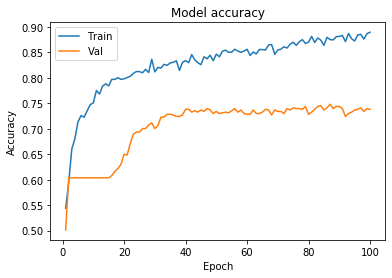

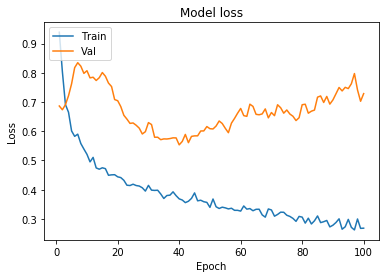

In [17]:
model_visualization(history, 100)

##### 